In [57]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_test.shape)
df_train.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [59]:
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

print("\nThe train data size after dropping Id shape is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id shape is : {} ".format(df_test.shape))


The train data size after dropping Id shape is : (1460, 80) 
The test data size after dropping Id shape is : (1459, 79) 


In [60]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 180921.20 and sigma = 79415.29



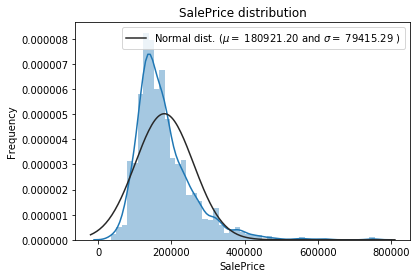

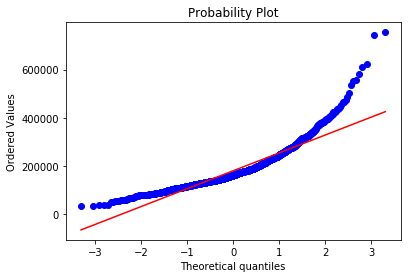

Skewness: 1.882876
Kurtosis: 6.536282


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm

# Plot Histogram
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())


 mu = 5.22 and sigma = 0.17



/Users/y_tamura/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


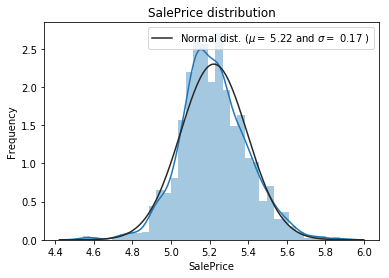

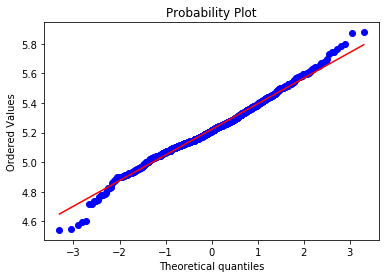

Skewness: 0.121335
Kurtosis: 0.809532


In [62]:
#log transform

import numpy as np

SalePrice_new = np.log10(df_train['SalePrice'])

sns.distplot(SalePrice_new, fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(SalePrice_new)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(SalePrice_new, plot=plt)
plt.show()

print("Skewness: %f" % SalePrice_new.skew())
print("Kurtosis: %f" % SalePrice_new.kurt())


 mu = 7.84 and sigma = 0.16



/Users/y_tamura/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


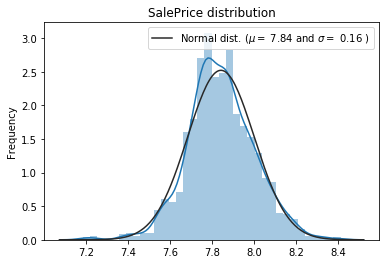

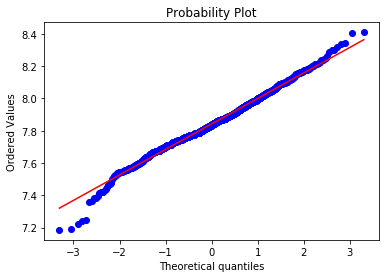

Skewness: -0.008644
Kurtosis: 0.870760


In [63]:
#box-cox transform
from scipy import stats

SalePrice_new = stats.boxcox(df_train['SalePrice'])[0]

sns.distplot(SalePrice_new, fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(SalePrice_new)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(SalePrice_new, plot=plt)
plt.show()

print("Skewness: %f" % stats.skew(SalePrice_new))
print("Kurtosis: %f" % stats.kurtosis(SalePrice_new))

In [67]:
df_train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [68]:
df_train.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [69]:
cat = len(df_train.select_dtypes(include=['object']).columns)
num = len(df_train.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  43 categorical + 37 numerical = 80 features


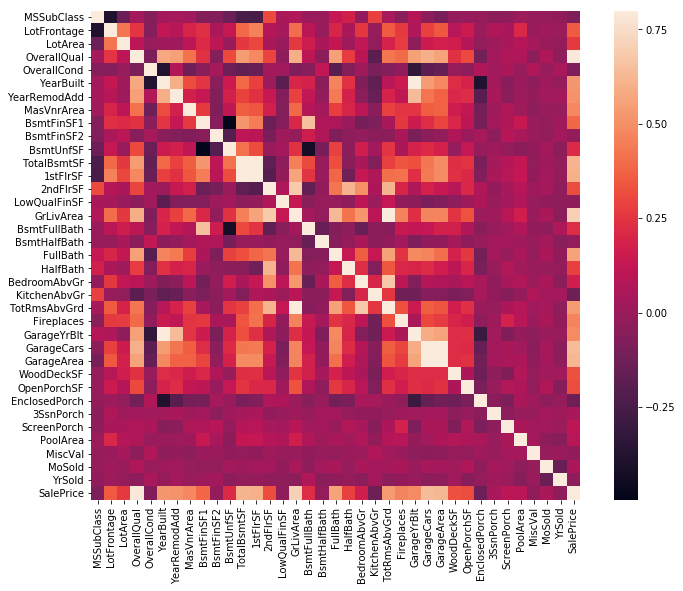

In [70]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

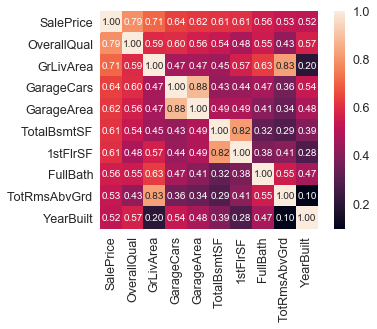

In [72]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [73]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


/Users/y_tamura/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  for obj in ["box", "whisker", "cap", "median", "flier"]:


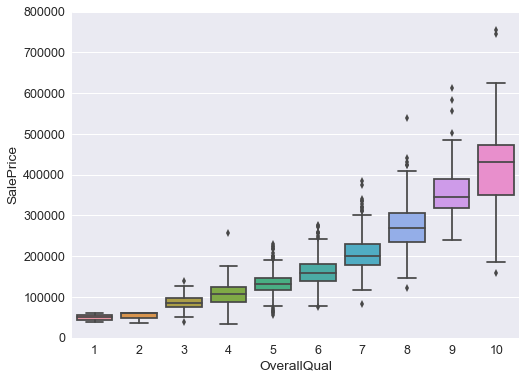

In [75]:
# Overall Quality vs Sale Price
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  for obj in ["box", "whisker", "cap", "median", "flier"]:


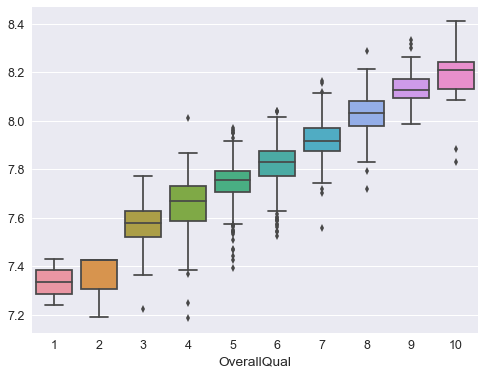

In [87]:
# Overall Quality vs Sale Price with box-cox transform
var = 'OverallQual'
SalePrice_new = pd.Series(SalePrice_new)

data = pd.concat([SalePrice_new, df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y=SalePrice_new, data=data)

In [14]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [15]:
X_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


値段の分布を表示

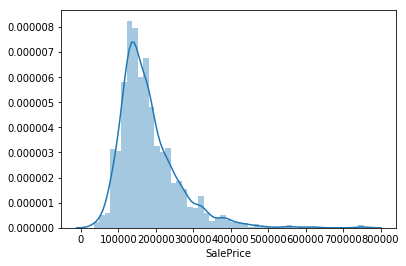

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(y_train)
plt.show()

値段が大きいので、常用対数をとって簡略化

In [18]:
import numpy as np

y_train_new = np.log10(y_train)
y_train_new.head()

0    5.319106
1    5.258877
2    5.349278
3    5.146128
4    5.397940
Name: SalePrice, dtype: float64

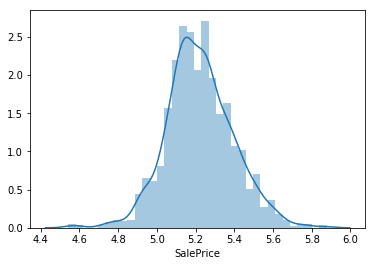

In [20]:
sns.distplot(y_train_new)
plt.show()

値段が密集しているところの特徴を抽出する

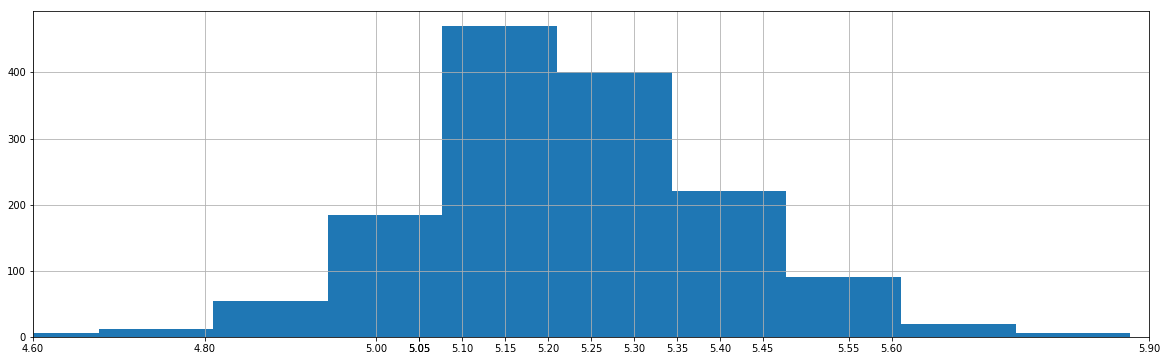

In [19]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.xlim([4.6, 5.9])
plt.xticks([4.6,4.8,5.0,5.05, 5.05, 5.1, 5.15, 5.20, 5.25, 5.30, 5.35, 5.40, 5.45, 5.55, 5.60, 5.9])
plt.hist(y_train_new)
plt.grid()
plt.show()

In [20]:
X_train_main= X_train[(y_train_new <= 5.35) &  (y_train_new > 5.075)]
X_train_low =X_train[(y_train_new <= 5.075)]
X_train_exp =X_train[(y_train_new > 5.35 )]
print('main shape', X_train_main.shape)
print('sub shape', X_train_low.shape)
print('sub shape', X_train_exp.shape)

main shape (891, 75)
sub shape (245, 75)
sub shape (324, 75)


これらの差異が値段に及ぼす影響を知りたい

In [21]:
X_train_main.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,30,0,320,0,0,700,10,2009,WD,Normal


In [22]:
X_train_main_int = X_train_main.select_dtypes(include=[np.number])
X_train_main_obj = X_train_main.select_dtypes(exclude=[np.number])
y_train_main = y_train_new[(y_train_new <= 5.35) &  (y_train_new > 5.075)]

X_train_low_int = X_train_low.select_dtypes(include=[np.number])
X_train_low_obj = X_train_low.select_dtypes(exclude=[np.number])
y_train_low = y_train_new[y_train_new <= 5.075]

X_train_exp_int = X_train_exp.select_dtypes(include=[np.number])
X_train_exp_obj = X_train_exp.select_dtypes(exclude=[np.number])
y_train_exp = y_train_new[y_train_new > 5.35]

In [23]:
X_train_main_int.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      181
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         6
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       23
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [24]:
X_train_low_int.isnull().sum()

Id                0
MSSubClass        0
LotFrontage      26
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      58
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

In [25]:
X_train_exp_int.isnull().sum()

Id                0
MSSubClass        0
LotFrontage      52
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        2
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt       0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

数値型の欠損値を補間

In [26]:
X_train_main_obj.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        6
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         10
BsmtCond         10
BsmtExposure     11
BsmtFinType1     10
BsmtFinType2     10
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       23
GarageFinish     23
GarageQual       23
GarageCond       23
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [27]:
print(X_train_low_obj.shape)
X_train_low_obj.isnull().sum()

(245, 38)


MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         27
BsmtCond         27
BsmtExposure     27
BsmtFinType1     27
BsmtFinType2     27
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       0
Functional        0
GarageType       58
GarageFinish     58
GarageQual       58
GarageCond       58
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [28]:
X_train_exp_obj.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       2
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

ひとまず、数値型においてカラムを中央値で補間する

ただし、セグメントを高価、普通、低価格と分けて、それぞれの中央値とする

In [29]:
main_null_col = ['MasVnrArea', 'LotFrontage', 'GarageYrBlt']
for i in main_null_col:
    X_train_main_int[i] = X_train_main_int[i] .fillna(X_train_main_int[i] .median())

low_null_col = ['LotFrontage', 'GarageYrBlt']
for i in low_null_col:
    X_train_low_int[i] = X_train_low_int[i] .fillna(X_train_low_int[i] .median())

exp_null_col = ['MasVnrArea', 'LotFrontage']
for i in exp_null_col:
    X_train_exp_int[i] = X_train_exp_int[i] .fillna(X_train_exp_int[i] .median())
    
print(X_train_main_int[main_null_col].isnull().sum())
print('//////////////////////////////////////////')
print(X_train_low_int[low_null_col].isnull().sum())
print('//////////////////////////////////////////')
print(X_train_exp_int[exp_null_col].isnull().sum())

MasVnrArea     0
LotFrontage    0
GarageYrBlt    0
dtype: int64
//////////////////////////////////////////
LotFrontage    0
GarageYrBlt    0
dtype: int64
//////////////////////////////////////////
MasVnrArea     0
LotFrontage    0
dtype: int64


/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

これらのうち、価格と相関のあるもの上位５個を抽出する

In [30]:
main = pd.concat([X_train_main_int, y_train_main], axis=1)
low = pd.concat([X_train_low_int, y_train_low], axis=1)
exp = pd.concat([X_train_exp_int, y_train_exp], axis=1)

In [31]:
main_corr = main.corr()
low_corr = low.corr()
exp_corr = exp.corr()

print ('main part', main_corr['SalePrice'].sort_values(ascending=False)[:6], '\n')
print('///////////////////////////////////////////////////////////////////')
print ('low part', low_corr['SalePrice'].sort_values(ascending=False)[:6], '\n')
print('///////////////////////////////////////////////////////////////////')
print ('exp part', exp_corr['SalePrice'].sort_values(ascending=False)[:6], '\n')

main part SalePrice      1.000000
OverallQual    0.591915
FullBath       0.530900
YearBuilt      0.478043
GarageCars     0.455655
GrLivArea      0.448509
Name: SalePrice, dtype: float64 

///////////////////////////////////////////////////////////////////
low part SalePrice       1.000000
OverallQual     0.446431
OverallCond     0.334001
GrLivArea       0.306719
1stFlrSF        0.279864
TotRmsAbvGrd    0.236574
Name: SalePrice, dtype: float64 

///////////////////////////////////////////////////////////////////
exp part SalePrice      1.000000
OverallQual    0.637371
GrLivArea      0.533678
TotalBsmtSF    0.516627
1stFlrSF       0.497750
GarageCars     0.466656
Name: SalePrice, dtype: float64 



In [32]:
main_null_col = ['MasVnrArea', 'LotFrontage', 'GarageYrBlt']
for i in main_null_col:
    X_train_main_int[i] = X_train_main_int[i] .fillna(X_train_main_int[i] .median())

low_null_col = ['LotFrontage', 'GarageYrBlt']
for i in low_null_col:
    X_train_low_int[i] = X_train_low_int[i] .fillna(X_train_low_int[i] .median())

exp_null_col = ['MasVnrArea', 'LotFrontage']
for i in exp_null_col:
    X_train_exp_int[i] = X_train_exp_int[i] .fillna(X_train_exp_int[i] .median())
    
print(X_train_main_int[main_null_col].isnull().sum())
print('//////////////////////////////////////////')
print(X_train_low_int[low_null_col].isnull().sum())
print('//////////////////////////////////////////')
print(X_train_exp_int[exp_null_col].isnull().sum())

MasVnrArea     0
LotFrontage    0
GarageYrBlt    0
dtype: int64
//////////////////////////////////////////
LotFrontage    0
GarageYrBlt    0
dtype: int64
//////////////////////////////////////////
MasVnrArea     0
LotFrontage    0
dtype: int64


/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

共通しているカラムでsubplotする

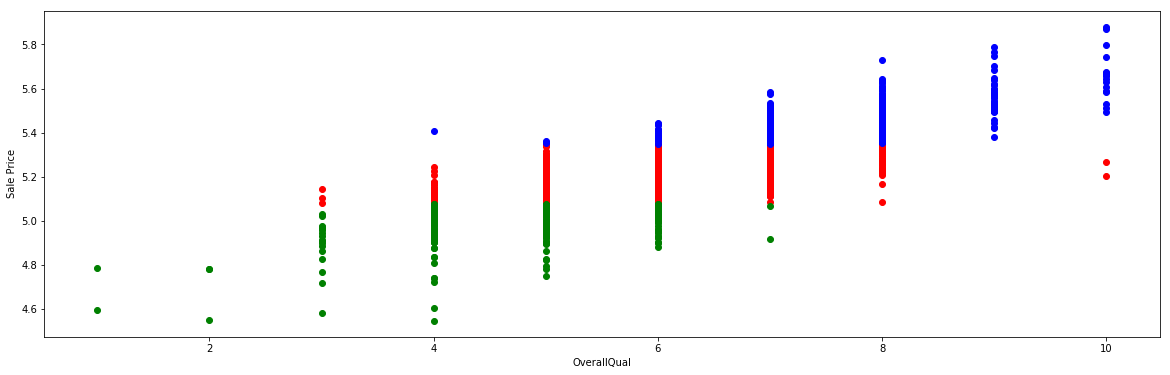

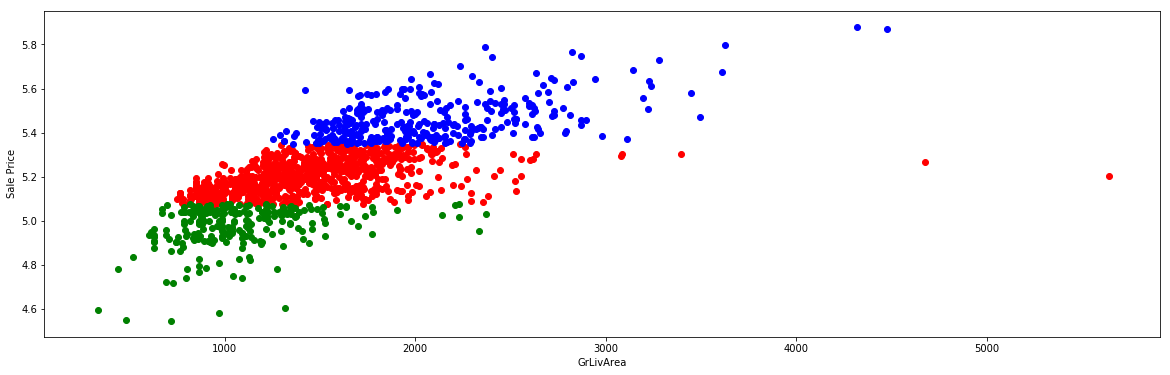

In [33]:
common_col = ['OverallQual', 'GrLivArea']
for i in common_col:
    plt.scatter(x=X_train_main_int[i], y=y_train_main,color='r')
    plt.scatter(x=X_train_low_int[i], y=y_train_low,color='g')
    plt.scatter(x=X_train_exp_int[i], y=y_train_exp,color='b')
    plt.ylabel('Sale Price')
    plt.xlabel(i)
    plt.show()

これらより、レイヤーがきちんと分かれているので、相関があるとみなせる

特徴的なカラムと値段を可視化する

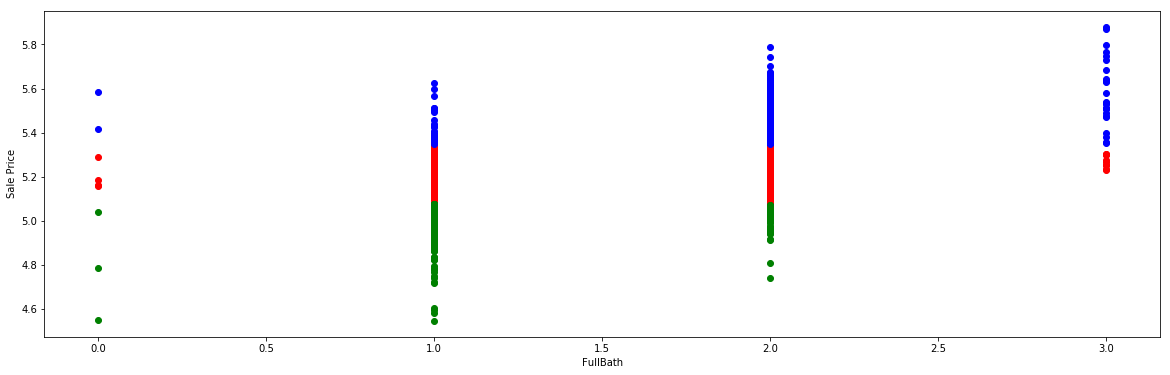

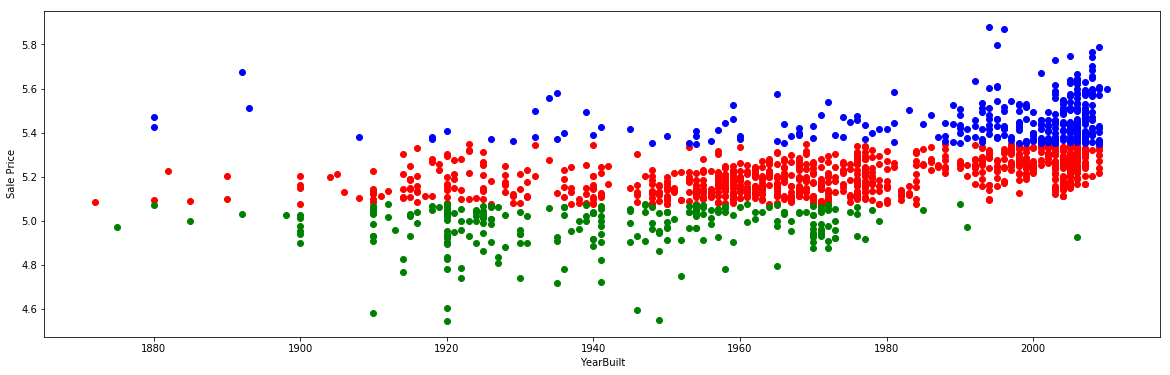

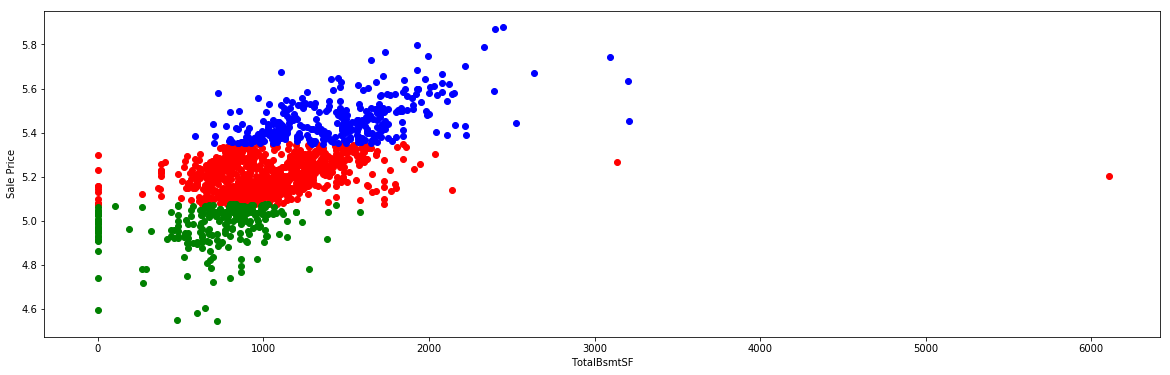

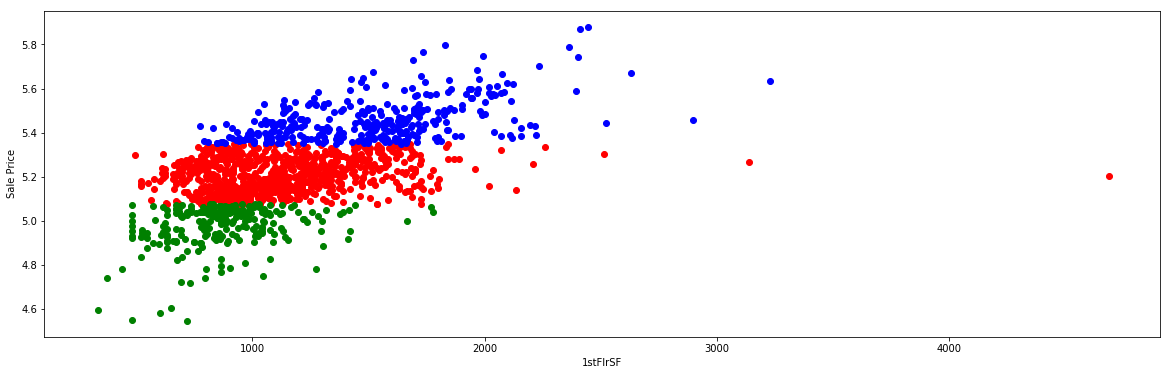

In [34]:
main_col = ['FullBath', 'YearBuilt']
low_col = [ '1stFlrSF', 'TotRmsAbvGrd']
exp_col = ['TotalBsmtSF', '1stFlrSF']

feature_col = ['FullBath', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', ]

for i in feature_col:
    plt.scatter(x=X_train_main_int[i], y=y_train_main,color='r')
    plt.scatter(x=X_train_low_int[i], y=y_train_low,color='g')
    plt.scatter(x=X_train_exp_int[i], y=y_train_exp,color='b')
    plt.ylabel('Sale Price')
    plt.xlabel(i)
    plt.show()

これらより上記のカラムYearbuiltをのぞいて、値が大きいほど値段が高く、低いほど値段が低いことが確認できる

次に、オブジェクト型を調べる

価格が高いものは、最頻値で補間する

In [35]:
null_columns = ['MasVnrType', 'BsmtFinType2']
for i in null_columns:
    X_train_exp_obj[i] = X_train_exp_obj [i].fillna(X_train_exp_obj[i].mode()[0])
X_train_exp_obj.isnull().any().sum()

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

価格が低い物件、価格が普通の物件の最頻値で補間する

In [36]:
for i in X_train_low_obj.columns.values:
    X_train_main_obj[i] =  X_train_main_obj[i].fillna(X_train_main_obj[i].mode()[0])
X_train_exp_obj.isnull().sum()

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [37]:
for i in X_train_low_obj.columns.values:
    X_train_low_obj[i] =  X_train_low_obj[i].fillna(X_train_low_obj[i].mode()[0])
X_train_low_obj.isnull().sum()

/Users/y_tamura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

ダミー変数化させる

In [38]:
X_train_main_obj_new = pd.get_dummies(X_train_main_obj, dummy_na=True, columns=X_train_main_obj.columns.values)
X_train_exp_obj_new = pd.get_dummies(X_train_exp_obj, dummy_na=True, columns=X_train_exp_obj.columns.values)
X_train_low_obj_new = pd.get_dummies(X_train_low_obj, dummy_na=True, columns=X_train_low_obj.columns.values)

In [39]:
main = pd.concat([X_train_main_obj_new, y_train_main], axis=1)
low = pd.concat([X_train_low_obj_new, y_train_low], axis=1)
exp = pd.concat([X_train_exp_obj_new, y_train_exp], axis=1)

In [40]:
main_corr = main.corr()
low_corr = low.corr()
exp_corr = exp.corr()

print ('main part', main_corr['SalePrice'].sort_values(ascending=False)[:6], '\n')
print('///////////////////////////////////////////////////////////////////')
print ('low part', low_corr['SalePrice'].sort_values(ascending=False)[:6], '\n')
print('///////////////////////////////////////////////////////////////////')
print ('exp part', exp_corr['SalePrice'].sort_values(ascending=False)[:6], '\n')

main part SalePrice              1.000000
ExterQual_Gd           0.482830
KitchenQual_Gd         0.469519
BsmtQual_Gd            0.462972
Foundation_PConc       0.439654
Exterior2nd_VinylSd    0.336313
Name: SalePrice, dtype: float64 

///////////////////////////////////////////////////////////////////
low part SalePrice             1.000000
CentralAir_Y          0.409699
PavedDrive_Y          0.254611
Electrical_SBrkr      0.217800
Neighborhood_NAmes    0.211894
ExterQual_TA          0.207483
Name: SalePrice, dtype: float64 

///////////////////////////////////////////////////////////////////
exp part SalePrice               1.000000
BsmtQual_Ex             0.556143
ExterQual_Ex            0.501309
KitchenQual_Ex          0.467514
RoofStyle_Hip           0.362250
Neighborhood_NridgHt    0.336110
Name: SalePrice, dtype: float64 



予測モデルを構築する

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

X_train, y_train, X_test, y_test = train_test_split(X_train, y_train, test)